In [84]:
from sklearn import tree
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [4]:
titanic_data = pd.read_csv("./titanic.csv")

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.shape

(891, 12)

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})

In [25]:
y = titanic_data["Survived"]

In [81]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [79]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

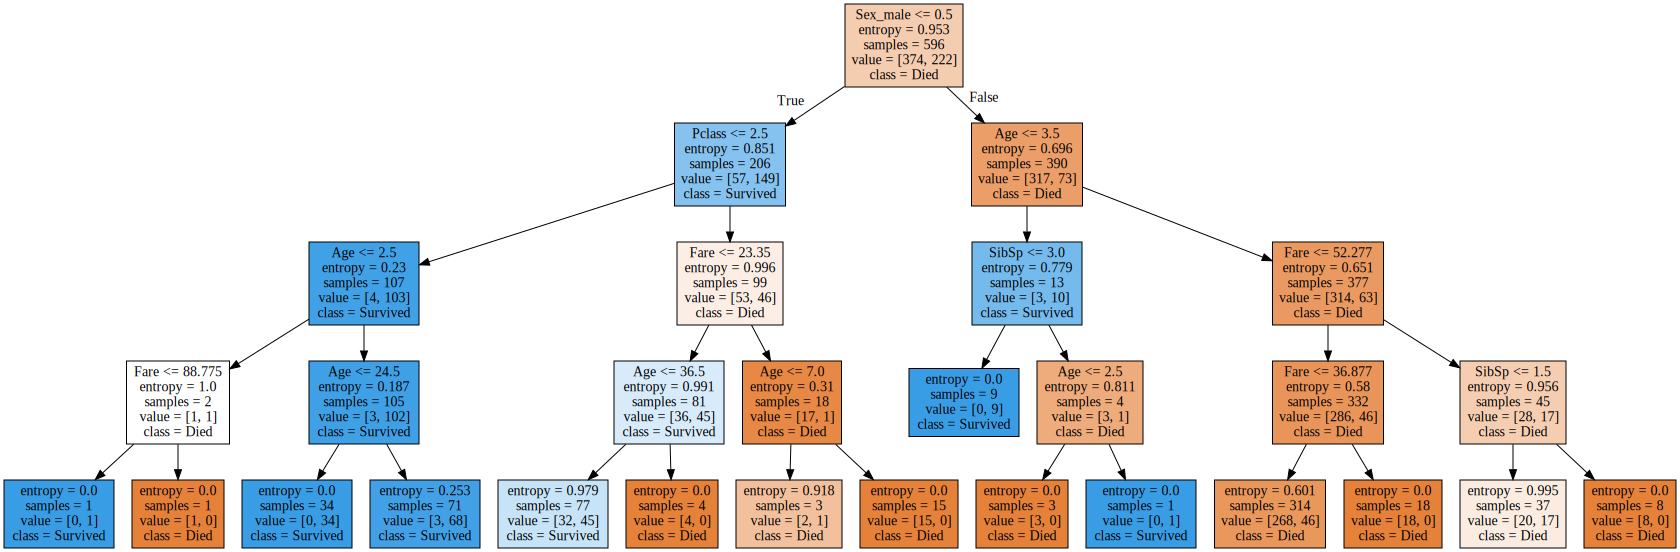

In [83]:
graph = Source (tree.export_graphviz(clf, out_file=None, feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0


In [35]:
X_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1


In [82]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
clf.score(X_train,y_train)

0.8238255033557047

In [56]:
clf.score(X_test,y_test)

0.8203389830508474

In [104]:
max_depth_values = range(1,100)

In [105]:
scores_data = pd.DataFrame()

In [106]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()

    temp_scores_data = pd.DataFrame({'max_depth':[max_depth],\
                                     'train_score':[train_score],\
                                     'test_score':[test_score],\
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_scores_data)

In [107]:
scores_data[scores_data.test_score == scores_data.test_score.max()]

,max_depth,train_score,test_score,cross_val_score
0,4,0.833893,0.823729,0.788627


In [110]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031


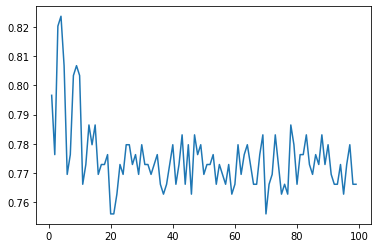

In [71]:
plt.plot(scores_data.max_depth, scores_data.test_score)

In [113]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'], var_name = 'set_type', value_name = 'score')

In [118]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.771863
293,96,cross_val_score,0.763473
294,97,cross_val_score,0.770168
295,98,cross_val_score,0.761779


<AxesSubplot:xlabel='max_depth', ylabel='score'>

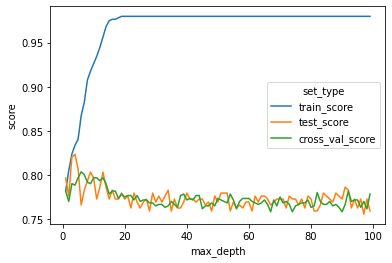

In [115]:
sns.lineplot(x ='max_depth', y='score', hue='set_type', data = scores_data_long)

## Cross-validation

In [85]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [87]:
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [121]:
scores_data_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031


In [123]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [124]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.7898305084745763